<a href="https://colab.research.google.com/github/josi1219/gdsc_study_session_ML_g1/blob/main/Mini_Proj/ride_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()


Saving rides.csv to rides.csv


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix



rides = pd.read_csv("rides.csv")

**Data Exploration**

We inspect the dataset to understand its structure, data types, and potential issues. This step helps identify missing values, inconsistent labels, and unusual values that may affect model performance.

In [26]:
rides.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance_km        250 non-null    float64
 1   duration_min       250 non-null    float64
 2   base_fare          250 non-null    float64
 3   demand_level       250 non-null    int64  
 4   traffic_level      238 non-null    object 
 5   weather_condition  238 non-null    object 
 6   time_of_day        250 non-null    object 
 7   ride_price         250 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 15.8+ KB


In [27]:
rides.isnull().sum()

,0
distance_km,0
duration_min,0
base_fare,0
demand_level,0
traffic_level,12
weather_condition,12
time_of_day,0
ride_price,0


In [28]:
rides.describe()

,distance_km,duration_min,base_fare,demand_level,ride_price
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,12.769964,38.374155,3.460528,2.992000,46.449111
std,7.138570,23.133072,0.856039,1.428319,21.157105
min,1.121478,2.369242,2.043634,1.000000,10.021574
25%,6.541862,18.828348,2.713869,2.000000,28.999198
50%,13.063793,36.321209,3.418307,3.000000,45.663445
75%,19.078869,57.154938,4.233079,4.000000,62.327269
max,24.685286,96.628404,4.999153,5.000000,134.120462


**Data Cleaning and Feature Preparation**

Categorical features like traffic level, weather condition, and time of day are converted into numerical columns. This allows machine learning models to process them correctly. True/False values are converted to 1/0 for clarity.

In [29]:
rides_encoded = pd.get_dummies(rides, drop_first=True).astype(int)
rides_encoded.head()


,distance_km,duration_min,base_fare,demand_level,ride_price,traffic_level_high,traffic_level_low,traffic_level_medium,weather_condition_rainy,weather_condition_stormy,time_of_day_evening,time_of_day_morning,time_of_day_night
0,9,25,4,3,40,1,0,0,0,0,0,0,1
1,23,65,3,3,79,0,0,1,0,1,0,0,1
2,18,68,2,3,69,0,1,0,0,1,0,1,0
3,15,40,4,2,47,0,1,0,1,0,0,0,0
4,4,11,4,4,28,0,0,1,0,0,0,0,1


**Regression Model – Price Prediction**

We train a Linear Regression model to predict the exact ride price.
The dataset is split into training and testing sets to evaluate performance on unseen data.
Numerical features are scaled to ensure fair contribution during training.
Mean Absolute Error (MAE) is used to measure how close predicted prices are to actual prices.

In [30]:
X = rides_encoded.drop('ride_price', axis=1)
y = rides_encoded['ride_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 3.5724465651941357


This plot compares the actual ride prices with the predicted prices from the Linear Regression model.
Points close to the diagonal indicate accurate predictions.
It visually shows how well the model captures price trends and highlights any large deviations.

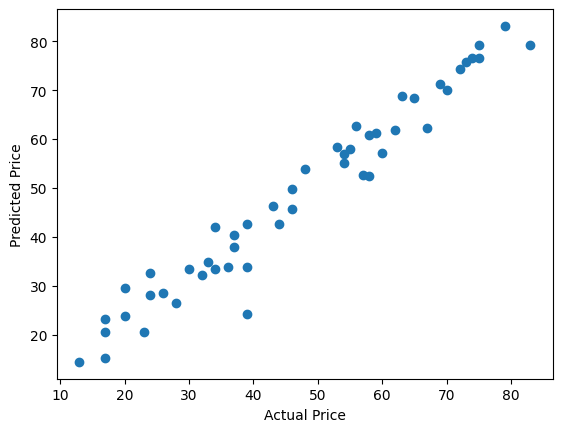

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


**Classification Model – High-Cost vs Low-Cost**

We convert ride price into a binary variable high_cost using the median price as a threshold.
A Logistic Regression model is trained to classify rides as high cost or low cost.
The dataset is split into training and testing sets, and numerical features are scaled.
Accuracy and the confusion matrix are used to evaluate how well the model classifies rides.
Logistic Regression outputs probabilities; if the probability of a ride being high cost is above 0.5, it is classified as high cost

In [32]:
median_price = rides_encoded['ride_price'].median()
rides_encoded['high_cost'] = (rides_encoded['ride_price'] > median_price).astype(int)

X_class = rides_encoded.drop(['ride_price', 'high_cost'], axis=1)
y_class = rides_encoded['high_cost']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)

y_pred_c = log_model.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))


Accuracy: 0.96
Confusion Matrix:
[[23  1]
 [ 1 25]]


**Analysis and Reflection**

Model Performance:

Regression: The Linear Regression model achieved a mean absolute error (MAE) of ~3.57 dollars. This shows predicted prices are close to actual prices. The plot of predicted vs actual prices confirms most predictions align with the true values.

Classification: The Logistic Regression model achieved 96% accuracy, with only 2 misclassified rides in the test set. The confusion matrix confirms the model separates high-cost and low-cost rides effectively.

Most Influential Features:

Distance and duration have the largest impact on ride price, as expected.

Demand level, traffic, and weather also influence price but to a lesser extent.

Data Quality Impact:

Missing values, inconsistent labels, and outliers could have reduced model performance. Handling these issues through cleaning and preprocessing improved both regression and classification results.

Ethical Considerations:

Surge pricing during emergencies could create unfairly high prices.

Relying on synthetic data may not capture all real-world complexities, so deployment decisions should be cautious.

Limitations:

The dataset is synthetic and simplified.

External factors like special promotions, passenger ratings, or dynamic real-time traffic are not included.

The binary classification threshold (median price) is arbitrary and may differ from actual business thresholds.